## Imports

In [1]:
import sklearn
sklearn.__file__

'/home/suzane/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py'

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import math
import collections
from os import listdir
from os.path import isfile, join
from scipy.spatial.distance import cosine
import time
import pickle

import numpy as np
import umap
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

from pprint import pprint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

np.random.seed(42)
plt.rcParams['figure.figsize'] = [15, 5]

In [3]:
def print_image(source, index):
    plt.rcParams["figure.figsize"] = (1,1) 
    ax = plt.subplot(111)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    img = source[index]
    plt.imshow(img)
    plt.show()
    plt.close()
    plt.rcParams["figure.figsize"] = (15,5)

## Construção da Base de Dados

In [4]:
# PEGA PATH DE TODAS IMAGENS E COLOCA EM UM ARRAY
all_paths = []
all_classes = []
classes = listdir('./natural_images_100/')

for root, dirs, files in os.walk('./natural_images_100/'):
    for d in dirs:
        for f in listdir(root + d):
            all_classes.append(d)
            all_paths.append(root + d + '/' + f)
            
size = len(all_paths) #800

In [5]:
# COLOCA TDS IMAGENS EM UM ARRAY DE IMAGENS PIL 224x224
all_images = np.empty(size, dtype=object)
for n in range(0, size):
    all_images[n] = image.load_img(all_paths[n], target_size=(224, 224))

## Criando o modelo

In [6]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
# model.summary()

In [7]:
# calculating to all features
# SALVA ARRAY DE FEATURES EM UM GRANDE ARRAY PARA TDS FEATURES
all_features = np.empty((size, model._nested_outputs.shape[1]))
feature_list_np = []
feature_list = []

for i in range(size):
    x = image.img_to_array(all_images[i])
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    feature_list_np.append(np.array(features))
    feature_list.append((np.array(features)).flatten())

    for feature in features:
        all_features[i] = feature

In [8]:
print(type(all_features))
print(np.shape(all_features))
print(np.shape(all_features[0]))
print(all_features[0])

print()

print(type(feature_list))
print(np.shape(feature_list))
print(np.shape(feature_list[0]))
print(feature_list[0])

<class 'numpy.ndarray'>
(800, 2048)
(2048,)
[0.42014617 0.         0.34967107 ... 0.75077534 0.04290411 0.03130105]

<class 'list'>
(800, 2048)
(2048,)
[0.42014617 0.         0.34967107 ... 0.75077534 0.04290411 0.03130105]


In [9]:
# PICKLE

pickle_features = 'features.pkl'
pickle_paths = 'paths.pkl'

def pickle_dump(dump, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(dump, f)

def pickle_load(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)
    
def load_features():
    with open(pickle_features, 'rb') as f:
        return pickle.load(f)

pickle_dump(all_features, pickle_features)
pickle_dump(all_paths, pickle_paths)


In [10]:
# printa features da primeira imagem
loaded_features = load_features()
len(loaded_features)
pprint(loaded_features[0])

for a in loaded_features:
    print(a)

array([0.42014617, 0.        , 0.34967107, ..., 0.75077534, 0.04290411,
       0.03130105])
[0.42014617 0.         0.34967107 ... 0.75077534 0.04290411 0.03130105]
[0.25014648 0.56063735 0.01711856 ... 0.5642193  0.35668808 0.17666301]
[0.17936145 1.23266304 0.37150022 ... 0.17380948 0.02482568 0.14252575]
[0.77001262 0.00760038 0.08621489 ... 0.22970524 0.02019105 0.01337338]
[0.22534408 0.09318956 0.04913997 ... 0.77348739 0.0097583  0.02655984]
[0.07732883 0.85850143 0.21969306 ... 0.08901384 0.3405422  0.24884687]
[0.17083046 0.3400467  0.11798084 ... 0.52834749 0.61291915 0.06370445]
[0.41875342 0.19023897 0.14812131 ... 0.95204216 0.02537184 0.69548512]
[0.36858505 0.56171513 0.09203406 ... 0.59944892 0.01089429 1.13324618]
[0.42809689 0.11862385 0.07736051 ... 3.667768   0.33137387 0.05425033]
[0.18654053 0.25673029 0.58337039 ... 0.75676912 0.47912535 0.23087958]
[0.12343977 0.38281959 0.44694829 ... 0.62439197 0.04033478 0.25829858]
[0.03695895 0.0936806  0.00193915 ... 0.1650

[0.         1.70964372 0.01129709 ... 0.54805911 0.14925992 0.01638641]
[0.45157406 1.52512646 0.19592464 ... 0.01644484 0.6825332  0.        ]
[0.100622   0.15387794 0.01160006 ... 0.117805   0.51573175 0.        ]
[0.27057627 0.98083848 0.21573517 ... 1.96649611 0.37791026 0.00734097]
[0.         0.02730184 1.06524003 ... 1.20003986 0.2403948  0.        ]
[0.43014929 0.13199137 0.28650415 ... 0.09285302 0.06611381 0.        ]
[0.40713879 0.35568357 1.64767897 ... 0.17130306 0.97223049 0.06462402]
[8.37936706e-04 4.34299139e-03 1.72914422e+00 ... 6.55557737e-02
 1.06476223e+00 2.43038192e-01]
[2.17817736 0.98747045 0.         ... 0.0713739  0.53648663 0.        ]
[0.11107356 0.17146838 0.7743035  ... 1.68511665 0.97976512 0.        ]
[0.04359457 0.02846962 1.79088843 ... 2.24798465 0.33523205 0.        ]
[0.17025904 0.02360198 2.60493255 ... 0.27259144 0.05301007 0.37413636]
[1.58387256 0.26981166 0.0831831  ... 0.12812392 0.02333401 0.01143527]
[0.89920807 1.20725    0.2848168  ... 0

In [11]:
# Verificando shape e tipo das features da prmeira imagem
print(feature_list[0].shape, features.dtype, '\n')

# Mostrando as features.
pprint(features[0])

(2048,) float32 

array([0.14382546, 0.9681448 , 0.86032826, ..., 2.6858609 , 0.55780584,
       0.        ], dtype=float32)


0.1778734386546571


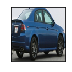

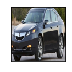

In [12]:
# COMPARA DUAS IMAGENS PARECIDAS PRA VALIDAR AS FEATURES
index_img_1 = 0
index_img_2 = 6
distance = cosine(loaded_features[index_img_1], loaded_features[index_img_2])
print(distance)
print_image(all_images, index_img_1)
print_image(all_images, index_img_2)

0.7353414847075925


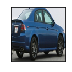

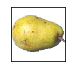

In [13]:
# COMPARA DUAS IMAGENS DE CLASSES DIFERENTES PRA VALIDAR AS FEATURES
index_img_1 = 0
index_img_2 = 799
distance = cosine(loaded_features[index_img_1], loaded_features[index_img_2])
print(distance)
print_image(all_images, index_img_1)
print_image(all_images, index_img_2)

# 2 Aplicação de Algoritmos de Agrupamento de Dados

### 2.1 Partitioning-based

In [14]:
# Inicializa Dataframe para plotar resultados
images_transformed = umap.UMAP(n_neighbors=5).fit_transform(loaded_features.data)
df = pd.DataFrame(images_transformed, columns=['x', 'y'])

/home/suzane/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


### 2.1.a - Kmeans

In [15]:
kmeans = KMeans(n_clusters=len(classes), random_state=0).fit(loaded_features)
print('Inércia do Kmeans: ', kmeans.inertia_)

Inércia do Kmeans:  502813.92799183895


In [16]:
df_kmeans = df
df_kmeans['label'] = kmeans.labels_
df_kmeans.head()

x         y  label
0  7.020144 -4.403748      5
1  6.735695 -4.664073      5
2  5.659161 -4.826827      5
3  6.909674 -4.765416      5
4  6.827643 -5.192720      5

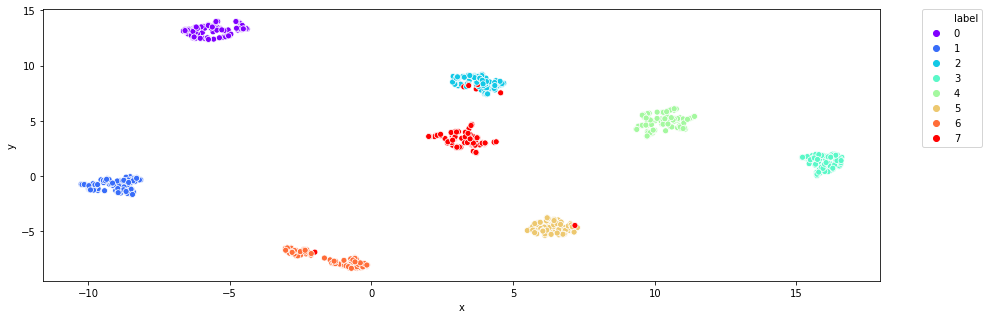

In [17]:
_ = sns.scatterplot(x='x', y='y', data=df_kmeans, hue='label', palette='rainbow', legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### 2.1.b - KMedoids

In [18]:
kmedoids = KMedoids(n_clusters=len(classes), random_state=0).fit(feature_list)
print('Inércia do KMedoids: ', kmedoids.inertia_)
print(kmedoids.labels_)
# reduced_data = PCA(n_components=len(classes)).fit_transform(feature_list)

# print(dir(reduced_data))

Inércia do KMedoids:  25259.21
[2 2 4 2 4 4 2 4 4 2 4 4 2 2 4 4 2 2 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4 4 2 2 4
 4 2 4 4 4 2 2 2 4 2 2 4 2 2 2 2 4 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2
 2 4 2 4 4 2 2 4 2 2 4 2 2 4 4 4 4 2 4 2 2 4 4 4 4 2 0 5 5 0 2 0 0 5 5 5 5
 5 5 5 0 0 0 5 5 5 5 5 0 5 1 5 0 5 5 5 1 5 5 5 5 0 5 5 5 0 0 5 5 5 5 5 5 5
 5 5 0 5 5 0 5 0 5 5 5 5 0 0 5 5 2 0 5 0 1 5 5 0 5 5 5 0 5 0 0 0 5 5 0 5 5
 5 5 0 5 0 5 5 0 0 5 0 5 5 0 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 5 0 5 5 5 5 5 2 0 0 5 5 5 5 5 5 5 5 5 5 5 0 0 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5
 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 0 1 5 5 5 5 5 5 5 5 5 5 5 5 2 4 4 2 4 4 4
 2 4 4 2 4 5 2 2 4 2 2 4 2 4 4 4 2 2 4 2 2 2 2 2 4 4 2 4 2 4 4 2 4 4 4 2 4
 2 4 2 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 4 2 4 2 4 4 4 2 2 2 4 2 2 4 2 4 

Cluster 0


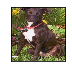

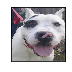

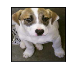

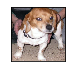

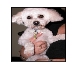

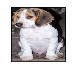

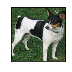

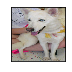

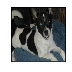

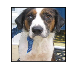

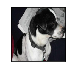

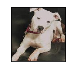

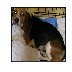

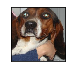

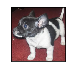

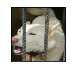

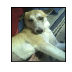

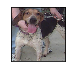

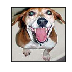

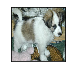

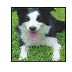

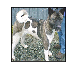

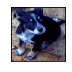

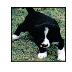

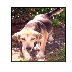

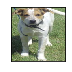

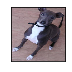

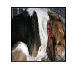

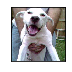

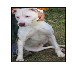

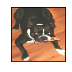

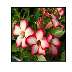

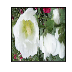

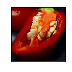

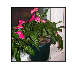

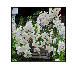

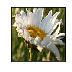

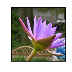

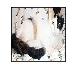

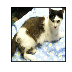

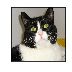

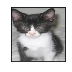

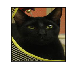

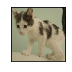

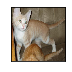

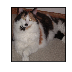

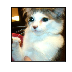

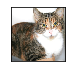

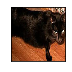

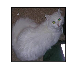

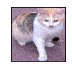

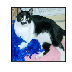

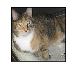

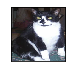

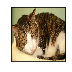

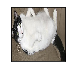

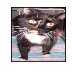

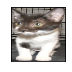

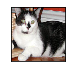

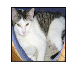

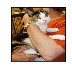

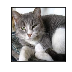

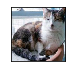

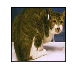

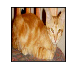

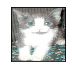

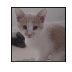

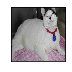

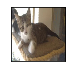

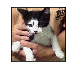

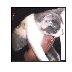

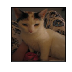

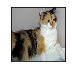

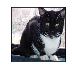

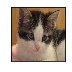

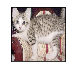

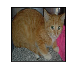

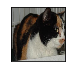

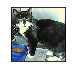

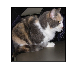

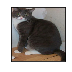

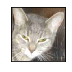

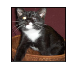

In [21]:
print("Cluster", 0)
for i in range(len(kmedoids.labels_)):
    if(kmedoids.labels_[i] == 0):
        print_image(all_images, i)

Cluster 1


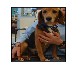

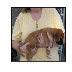

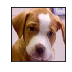

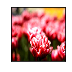

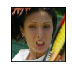

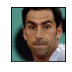

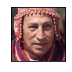

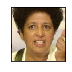

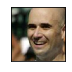

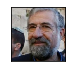

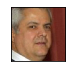

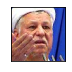

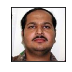

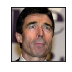

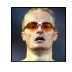

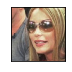

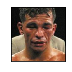

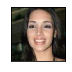

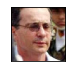

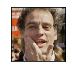

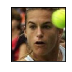

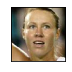

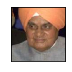

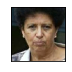

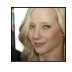

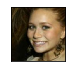

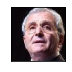

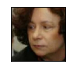

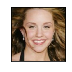

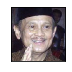

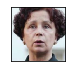

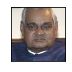

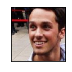

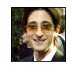

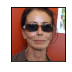

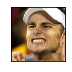

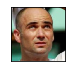

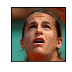

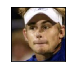

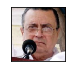

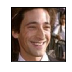

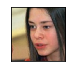

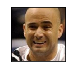

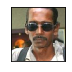

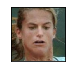

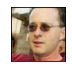

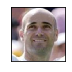

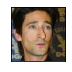

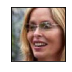

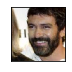

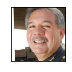

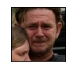

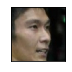

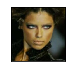

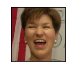

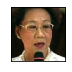

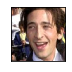

In [23]:
print("Cluster", 1)
for i in range(len(kmedoids.labels_)):
    if(kmedoids.labels_[i] == 1):
        print_image(all_images, i)

In [24]:
len(kmedoids.labels_)

800

In [25]:
df_kmedoids = df
df_kmedoids['label'] = kmedoids.labels_
df_kmedoids.head()


x         y  label
0  7.020144 -4.403748      2
1  6.735695 -4.664073      2
2  5.659161 -4.826827      4
3  6.909674 -4.765416      2
4  6.827643 -5.192720      4

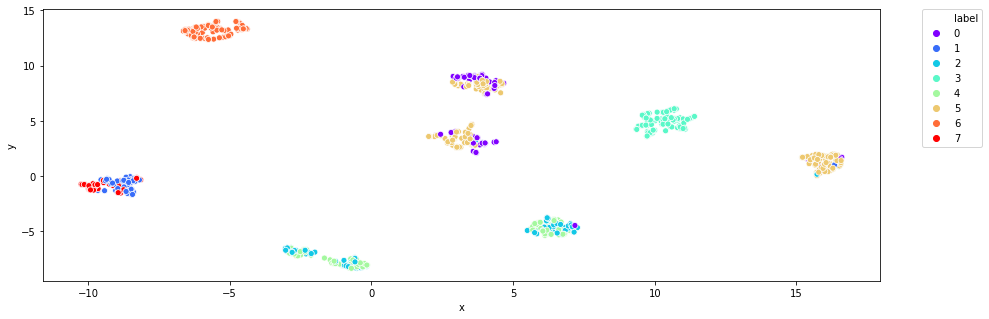

In [26]:
_ = sns.scatterplot(x='x', y='y', data=df_kmedoids, hue='label', palette='rainbow', legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### 2.1.c - Mini Batch KMeans

In [27]:
miniBatchKmeans = MiniBatchKMeans(n_clusters=len(classes), random_state=0).fit(feature_list)

print('Inércia do Mini Batch Kmeans: {}\n'.format(miniBatchKmeans.inertia_))
print('Labels: ', miniBatchKmeans.labels_)


Inércia do Mini Batch Kmeans: 522193.60582293174

Labels:  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 

Cluster 0


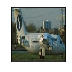

In [28]:
print("Cluster", 0)
for i in range(len(miniBatchKmeans.labels_)):
    if(miniBatchKmeans.labels_[i] == 0):
        print_image(all_images, i)

Cluster 1


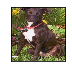

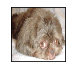

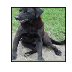

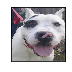

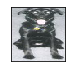

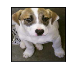

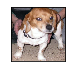

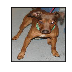

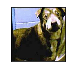

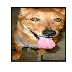

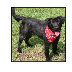

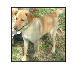

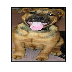

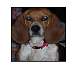

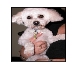

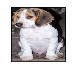

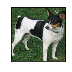

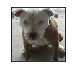

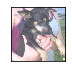

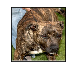

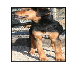

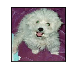

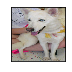

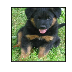

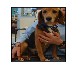

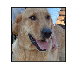

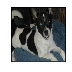

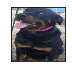

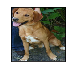

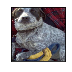

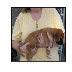

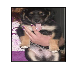

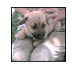

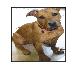

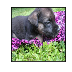

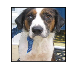

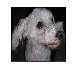

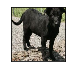

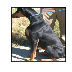

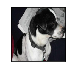

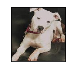

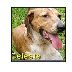

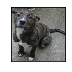

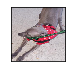

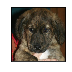

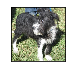

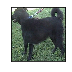

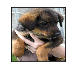

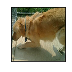

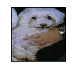

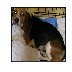

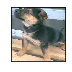

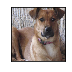

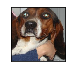

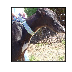

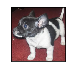

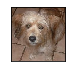

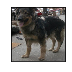

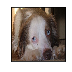

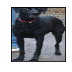

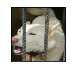

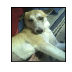

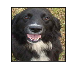

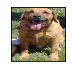

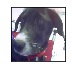

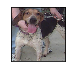

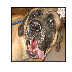

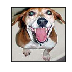

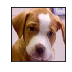

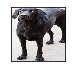

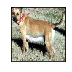

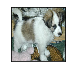

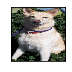

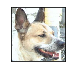

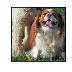

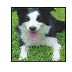

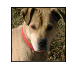

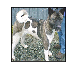

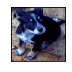

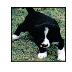

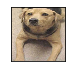

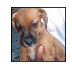

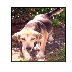

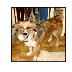

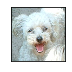

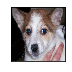

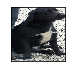

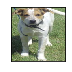

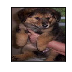

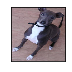

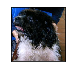

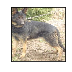

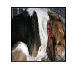

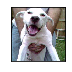

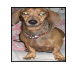

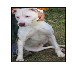

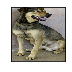

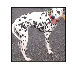

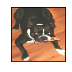

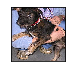

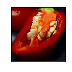

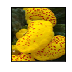

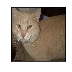

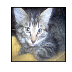

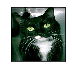

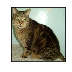

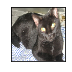

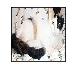

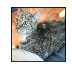

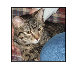

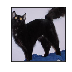

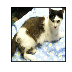

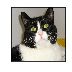

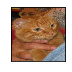

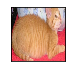

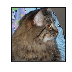

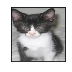

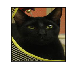

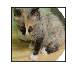

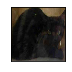

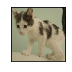

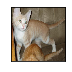

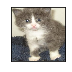

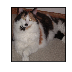

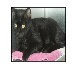

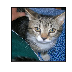

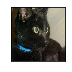

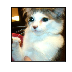

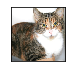

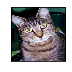

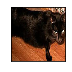

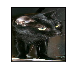

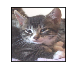

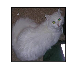

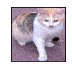

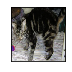

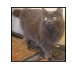

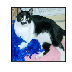

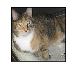

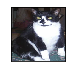

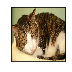

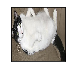

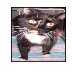

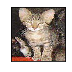

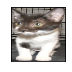

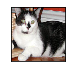

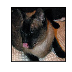

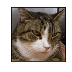

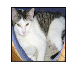

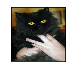

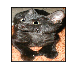

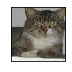

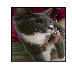

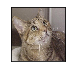

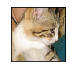

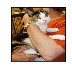

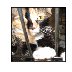

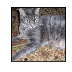

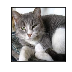

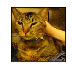

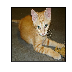

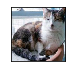

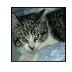

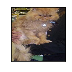

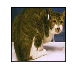

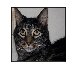

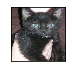

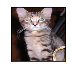

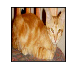

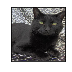

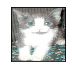

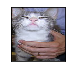

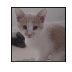

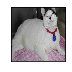

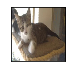

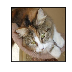

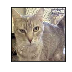

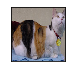

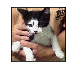

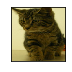

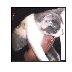

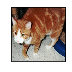

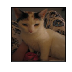

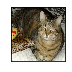

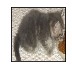

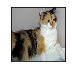

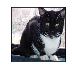

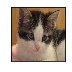

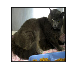

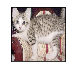

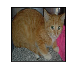

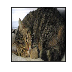

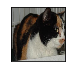

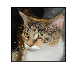

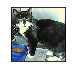

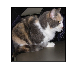

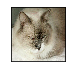

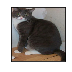

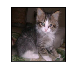

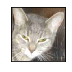

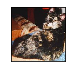

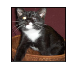

In [29]:
print("Cluster", 1)
for i in range(len(miniBatchKmeans.labels_)):
    if(miniBatchKmeans.labels_[i] == 1):
        print_image(all_images, i)

Cluster 2


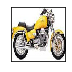

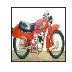

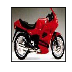

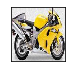

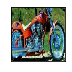

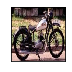

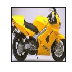

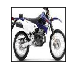

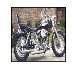

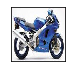

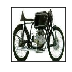

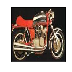

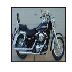

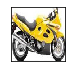

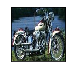

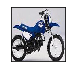

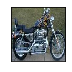

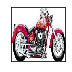

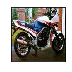

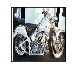

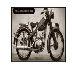

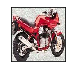

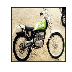

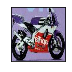

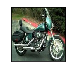

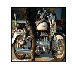

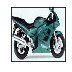

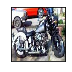

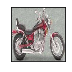

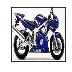

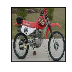

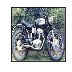

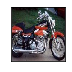

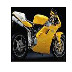

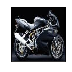

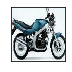

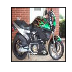

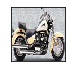

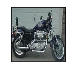

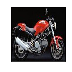

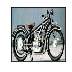

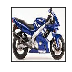

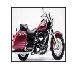

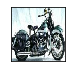

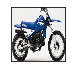

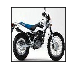

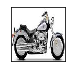

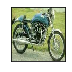

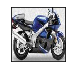

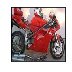

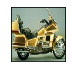

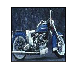

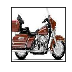

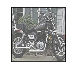

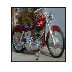

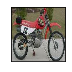

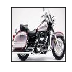

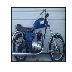

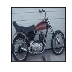

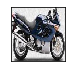

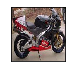

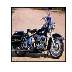

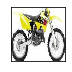

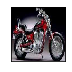

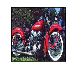

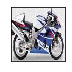

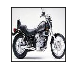

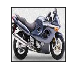

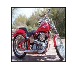

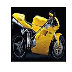

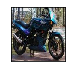

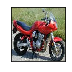

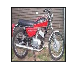

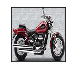

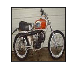

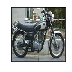

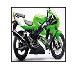

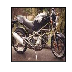

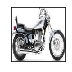

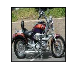

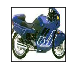

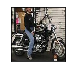

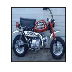

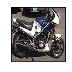

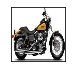

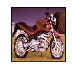

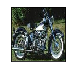

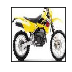

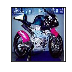

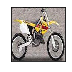

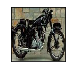

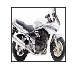

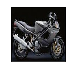

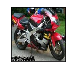

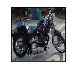

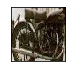

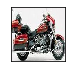

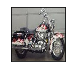

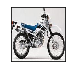

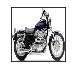

In [30]:
print("Cluster", 2)
for i in range(len(miniBatchKmeans.labels_)):
    if(miniBatchKmeans.labels_[i] == 2):
        print_image(all_images, i)

In [31]:
df_miniBatchKmeans = df
df_miniBatchKmeans['label'] = miniBatchKmeans.labels_
df_miniBatchKmeans.head()


x         y  label
0  7.020144 -4.403748      4
1  6.735695 -4.664073      4
2  5.659161 -4.826827      4
3  6.909674 -4.765416      4
4  6.827643 -5.192720      4

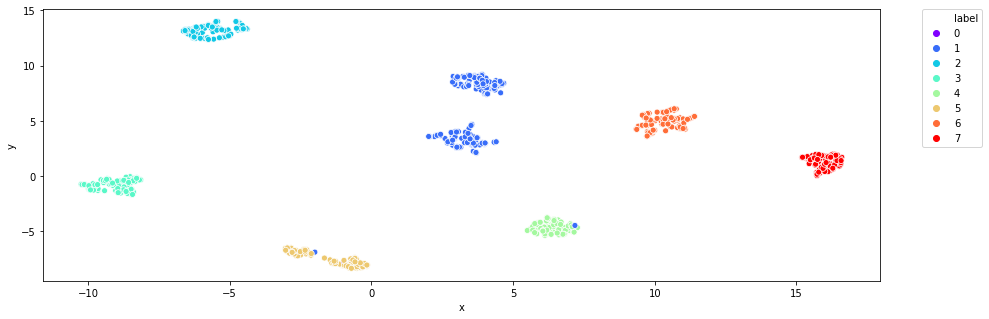

In [32]:
_ = sns.scatterplot(x='x', y='y', data=df_miniBatchKmeans, hue='label', palette='rainbow', legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### 2.2 Hierarchical-based

### 2.2.a Hierarchical Agglomerative Clustering - Single Linkage

In [33]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
Z = ward(pdist(feature_list))
clusters = fcluster(Z, t=0.9, criterion='distance')
clusters

array([107, 110, 147, 183, 177, 144, 111, 160, 167, 108, 174, 170, 181,
       114, 169, 152, 199, 193, 175, 164, 185, 141, 149, 138, 176, 197,
       112, 150, 131, 168, 171, 129, 134, 109, 115, 187, 190, 162, 184,
       126, 153, 157, 113, 201, 123, 104, 196, 191, 155, 106, 140, 145,
       116, 146, 172, 182, 165, 189, 130, 148, 194, 135, 117, 102, 121,
       142, 186, 158, 124, 156, 166, 192, 119, 143, 125, 159, 105, 132,
       154, 103, 200, 198, 195, 118, 161, 128, 139, 173, 137, 127, 179,
       122, 136, 180, 188, 133, 178, 151, 163, 120, 793, 702, 787, 739,
       101, 733, 731, 768, 724, 763, 785, 774, 761, 719, 691, 732, 795,
       740, 752, 791, 758, 689, 769, 746, 780, 777, 797, 754, 775, 729,
       744, 753, 782, 764, 751, 749, 693, 786, 755, 727, 737, 722, 792,
       742, 750, 698, 783, 747, 778, 692, 721, 760, 776, 720, 743, 798,
       704, 756, 703, 788, 718, 773, 694, 762, 728, 734, 730, 723, 726,
       789, 779, 700, 770, 771, 696, 695, 725, 796, 799, 699, 76

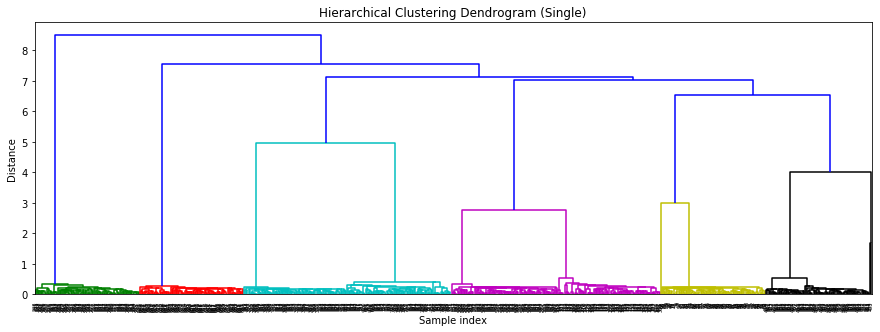

In [34]:
df_single = df
linkage_matrix_single = linkage(df_single, method='single')
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
d = dendrogram(linkage_matrix_single)


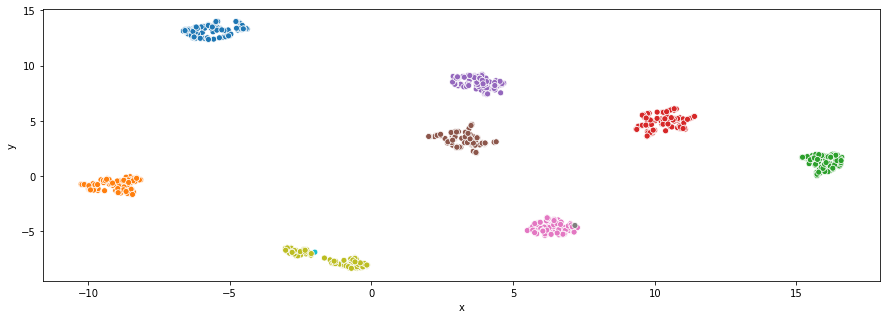

In [35]:
labels = fcluster(linkage_matrix_single, 1.6, 'distance')
df_single['cluster_labels'] = labels
_ = sns.scatterplot(x='x', y='y', data=df_single, hue='cluster_labels', palette='tab10', legend=False)

### 2.2.b Hierarchical Agglomerative Clustering - Complete Linkage

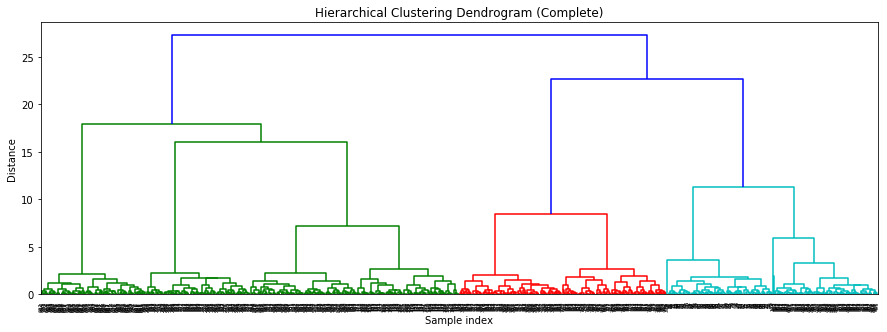

In [36]:
df_complete = df
linkage_matrix_complete = linkage(df_complete, method='complete')
plt.title('Hierarchical Clustering Dendrogram (Complete)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
d = dendrogram(linkage_matrix_complete)

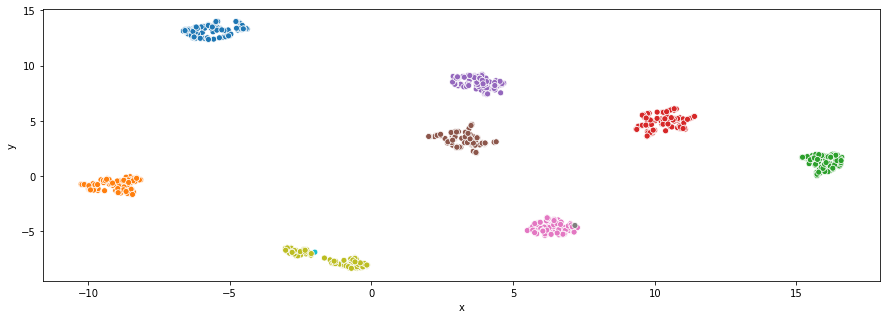

In [37]:
df_complete['cluster_labels'] = labels
_ = sns.scatterplot(x='x', y='y', data=df_complete, hue='cluster_labels', palette='tab10', legend=False)

### 2.2.c Hierarchical Agglomerative Clustering - Average Linkage

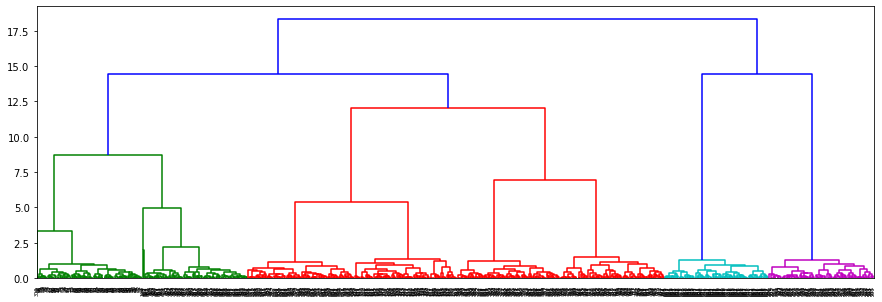

In [38]:
df_average = df
linkage_matrix = linkage(df_average, method='average')
d = dendrogram(linkage_matrix)

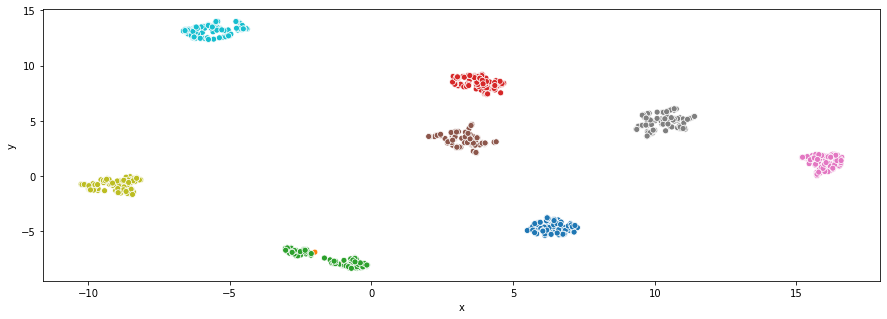

In [39]:
labels = fcluster(linkage_matrix, 3.5, 'distance')
df_average['cluster_labels'] = labels
_ = sns.scatterplot(x='x', y='y', data=df_average, hue='cluster_labels', palette='tab10', legend=False)


### Density-based

In [40]:
#  sklearn.cluster.DBSCAN

### Grid-based

### Model-based

# 3 Avaliação do resultado dos agrupamentos de dados

### Quantitativas

#### Interno

#### Externo

#### Relativo

### Subjetiva